1.阶跃函数：将输入数组x中大于0的元素转换为1，小于等于0的元素转换为0

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
step_function(3.0) #但不允许参数取 NumPy 数组

1

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0 #对 NumPy 数组进行不等号运算后，数组的各个元素都会进行不等号运算，生成一个布尔型数组（这里x＞0为True)
x,y

(array([-1.,  1.,  2.]), array([False,  True,  True]))

In [34]:
y = y.astype(np.int64) #修改数组中数据元素类型，将布尔型转换为 int 型
y2 = step_function(x) #y = y2
y,y2

(array([0, 1, 1]), array([0, 1, 1]))

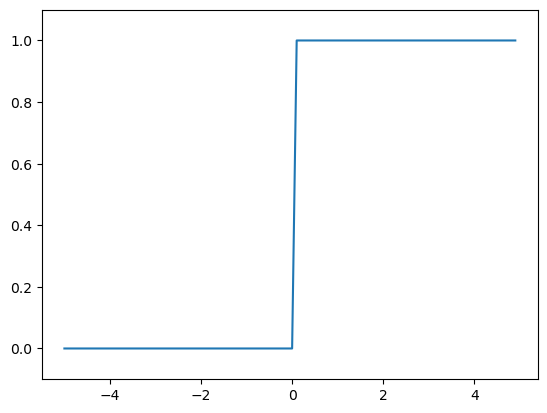

In [ ]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int64) #dtype是返回数组中的数据元素类型，先发生数组进行布尔运算，再转换为整数
x = np.arange(-5.0, 5.0, 0.1)  #以 0.1 为单位，生成NumPy 数组（[-5.0, -4.9, ……， 4.9]）
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定 y 轴的范围
plt.show()

y.astype(np.int64) # 显式转换为整数——先创建布尔数组，再用 .astype() 转换类型
np.array(x > 0, dtype=np.int64)  # 一步生成整数数组

2.sigmoid 函数

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

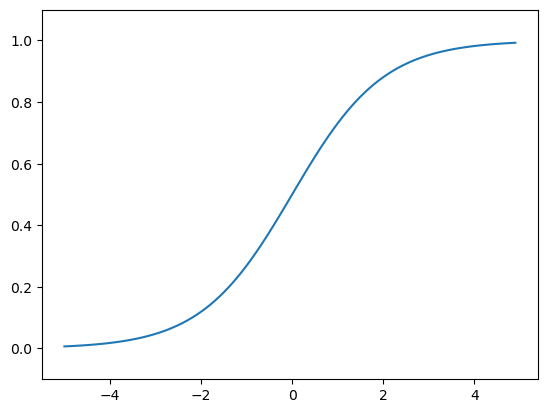

In [38]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定 y 轴的范围
plt.show()

3.ReLU函数：
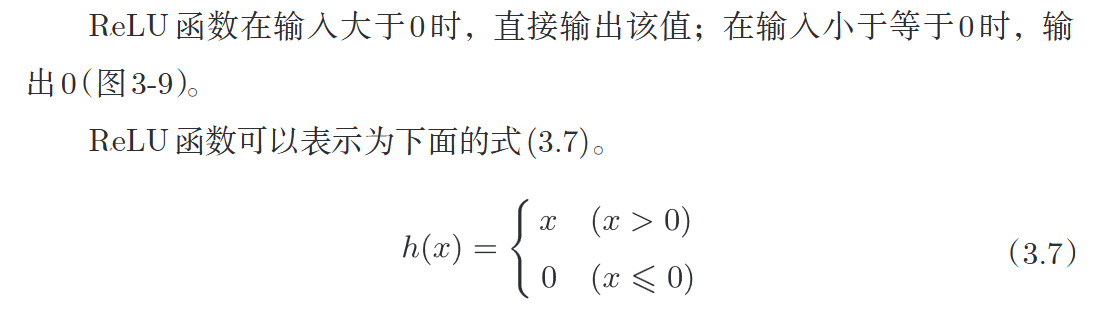

In [40]:
def relu(x):
    return np.maximum(0, x)
x = relu(5)
x

5

4.神经网络的内积

In [ ]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)#一维x二维时，视为行向量(1x2)x列向量(2x3)，得到1行3列，得到行向量
X.shape,W,W.shape,Y,Y.shape

((2,),
 array([[1, 3, 5],
        [2, 4, 6]]),
 (2, 3),
 array([ 5, 11, 17]),
 (3,))

5.三层神经网络：输入层→隐藏层*2→输出层

In [46]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)
A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [47]:
Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
A2,Z2

(3,)
(3, 2)
(2,)


(array([0.51615984, 1.21402696]), array([0.62624937, 0.7710107 ]))

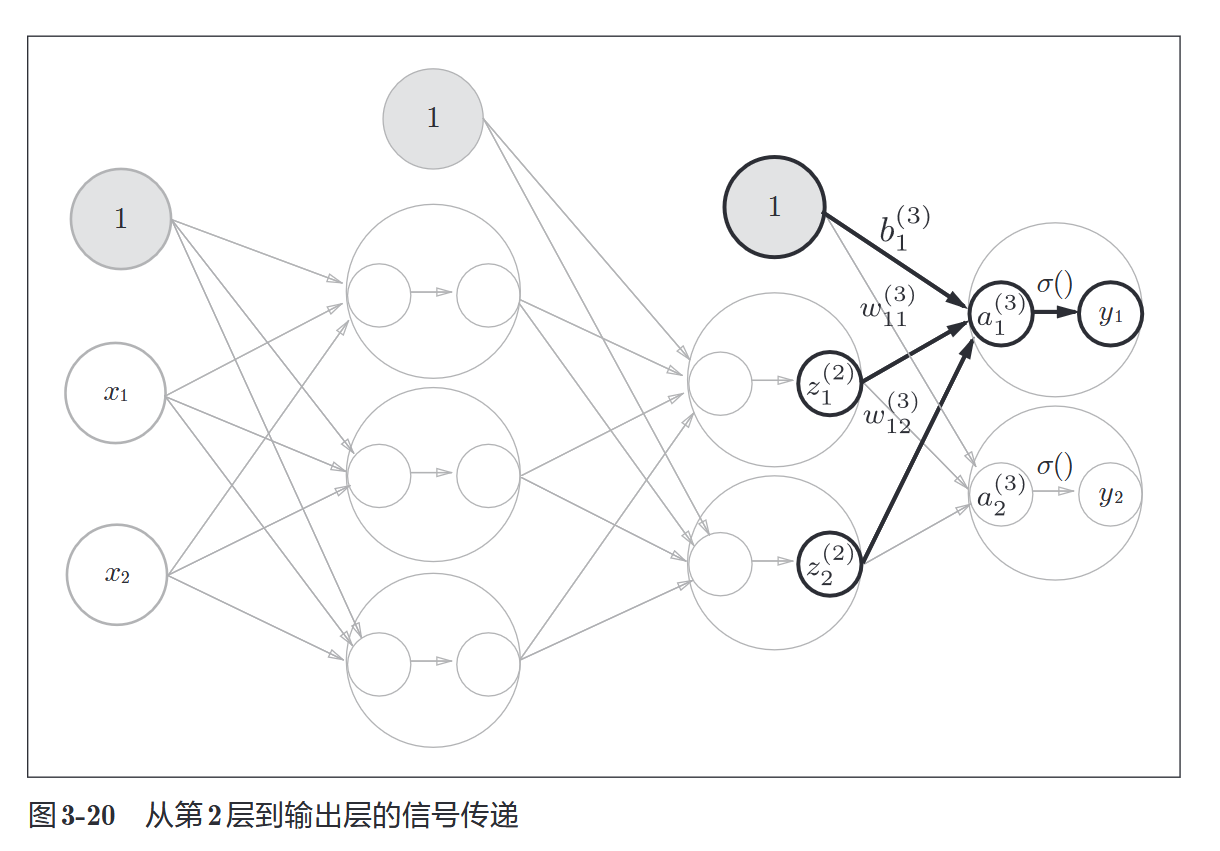

In [52]:
def identity_function(x): #恒等函数，作为输出层的激活函数
    return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者 Y = A3
Y

array([0.31682708, 0.69627909])

In [126]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def identity_function(x):
    return x  # 输出层不激活
def init_network(): #创建并返回新字典的函数
    network = {} #字典变量 network 中保存了每一层所需的参数（权重和偏置）
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def forward(network, x): #forward() 函数中则封装了将输入信号转换为输出信号的处理过程
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
network = init_network() #调用，得到network的参数字典
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


In [129]:
s = network['W1']
network,network['W1'],s

({'W1': array([[0.1, 0.3, 0.5],
         [0.2, 0.4, 0.6]]),
  'b1': array([0.1, 0.2, 0.3]),
  'W2': array([[0.1, 0.4],
         [0.2, 0.5],
         [0.3, 0.6]]),
  'b2': array([0.1, 0.2]),
  'W3': array([[0.1, 0.3],
         [0.2, 0.4]]),
  'b3': array([0.1, 0.2])},
 array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]))

6.输出层的设计(softmax 函数):神经网络可以用在分类问题和回归问题上,一般而言，回归问题用恒等函数，分类问题用 softmax 函数

In [136]:
#softmax 函数
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


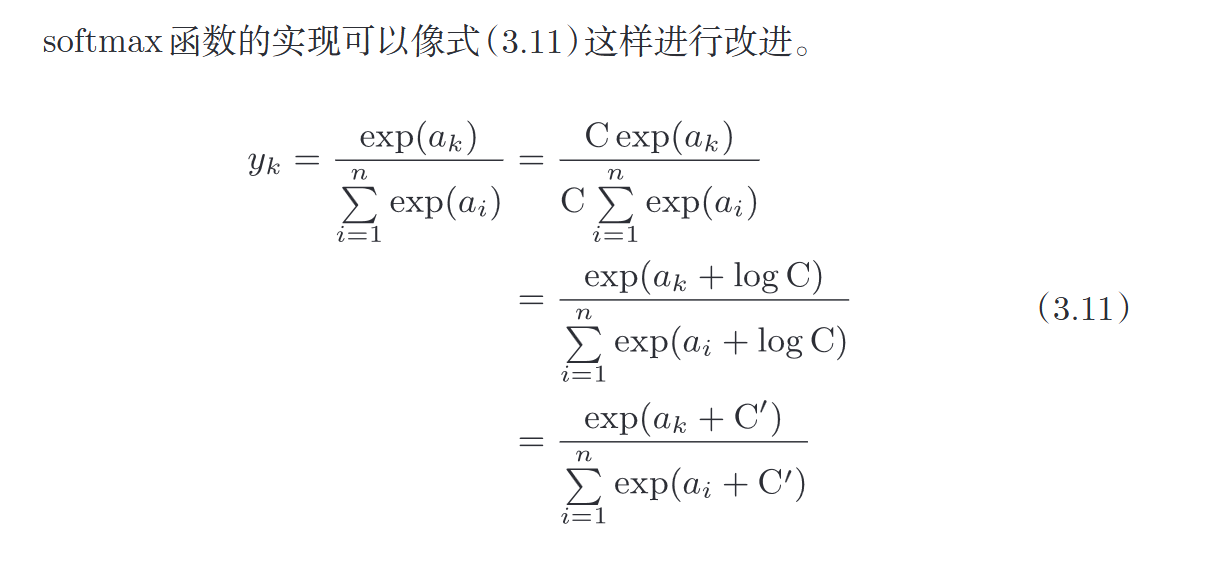

In [ ]:
#softmax 函数改进
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # softmax 函数的运算，由于指数太大，不能正确运算

/tmp/ipykernel_82798/53712053.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # softmax 函数的运算
/tmp/ipykernel_82798/53712053.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # softmax 函数的运算


array([nan, nan, nan])

In [138]:
c = np.max(a)
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [139]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) #softmax 函数的输出是 0.0 到 1.0 之间的实数
np.sum(y) #输出总和为 1 ，即softmax函数的输出为概率
#上述结果可以表示为因为第 2 个元素的概率最高，所以答案是第 2 个类别
#在只需要分类结果（不需要具体概率值）的情况下，计算 softmax (y) 就是多余的，可以省略，直接用 argmax(a) 得到预测类别；
#只要知道 a 中最大值的索引，就能得到和计算 y 后再找最大值索引完全相同的分类结果（不需要求详细的概率）

[0.01821127 0.24519181 0.73659691]


1.0